In [2]:
import pandas as pd
import pandas_ta as ta
import mplfinance as mpf
import numpy as np
import mplfinance as mpf
import matplotlib.pyplot as plt



In [3]:

def create_tema(stock: pd.DataFrame, MA_period:int ) -> pd.Series:

    ema1 = ta.ema(stock['Close'], length=MA_period)

    # Calculate the second EMA
    ema2 = ta.ema(ema1, length=MA_period)

    # Calculate the third EMA
    ema3 = ta.ema(ema2, length=MA_period)

    # Calculate TEMA
    tema = 3 * (ema1 - ema2) + ema3
    #stock[f'tema_{MA_period}'] = tema
    return tema



In [4]:

# Define your custom strategy using CustomStrategy
CustomStrategy = ta.Strategy(
    name="Customize technical indicator",
    description="Natr, ",
    ta=[
        {"kind": "natr", 'length':3 },
        {"kind": "rsi", 'length':3 },
        {"kind": "adx", 'length':3 },
        {"kind": "cci", 'length':3 },
        {"kind": "roc", 'length':3 },
        {"kind": "stoch", 'length':3 },
        {"kind": "willr", 'length':3 },
        {"kind": "obv"},
        {"kind": "macd"},
        {"kind": "bbands", 'length':3},
    ]
)

In [5]:
def create_min_max_mid_price(stock: pd.DataFrame, period:int ) -> pd.Series:
    stock[f'min_price_{period}'] = stock['Low'].rolling(window=period).min()
    stock[f'max_price_{period}'] = stock['High'].rolling(window=period).max()
    stock['mid_price'] = (stock['High'] + stock['Low']) / 2


In [6]:
def calculate_MA_smoothness( ma:pd.Series):
    diff_i = ma -ma.shift(1)
    diff_i = diff_i.dropna()
    smooth =(diff_i-diff_i.shift(1)).dropna()
    smooth = smooth.abs().mean()
    return smooth
def calculate_MA_lag(stock: pd.DataFrame, ma:pd.Series):
    lag = (stock['Close']-ma).dropna()
    lag= lag.abs().mean()
    return lag

In [7]:
df = pd.DataFrame()
#data = pd.read_csv('/Users/hieudao/Desktop/ai/do_an/datas/AAPL_stock.csv')
test = df.ta.ticker("aapl")
test.ta.strategy(CustomStrategy)
create_min_max_mid_price(test, 3)
test['tema_2'] = create_tema(test, 2)
test['tema_100'] = create_tema(test,100)
test.tail(1)


,Open,High,Low,Close,Volume,Dividends,Stock Splits,NATR_3,RSI_3,ADX_3,...,BBL_3_2.0,BBM_3_2.0,BBU_3_2.0,BBB_3_2.0,BBP_3_2.0,min_price_3,max_price_3,mid_price,tema_2,tema_100
Date,,,,,,,,,,,,,,,,,,,,,
2023-07-07 00:00:00-04:00,191.410004,192.669998,190.240005,190.679993,46778000,0.0,0.0,1.344982,41.97973,36.480167,...,190.347211,191.273331,192.19945,0.968373,0.179664,189.199997,192.979996,191.455002,190.70418,191.312508


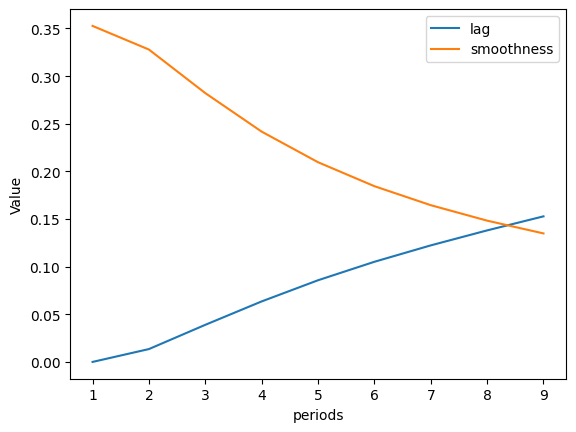

In [8]:
periods = []
lag = []
smoothness = []

for i in range(1,10):
    tema = create_tema(test,i)    
    periods.append(i)
    lag.append(calculate_MA_lag(test, tema))
    smoothness.append(calculate_MA_smoothness(tema))
# Plotting
plt.plot(periods, lag, label='lag')
plt.plot(periods, smoothness, label='smoothness')

plt.xlabel('periods')
plt.ylabel('Value')
plt.legend()
plt.show()

In [9]:
test['tema_8'] = create_tema(test,8)
test

,Open,High,Low,Close,Volume,Dividends,Stock Splits,NATR_3,RSI_3,ADX_3,...,BBM_3_2.0,BBU_3_2.0,BBB_3_2.0,BBP_3_2.0,min_price_3,max_price_3,mid_price,tema_2,tema_100,tema_8
Date,,,,,,,,,,,,,,,,,,,,,
1980-12-12 00:00:00-05:00,0.099584,0.100017,0.099584,0.099584,469033600,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.099800,NaN,NaN,NaN
1980-12-15 00:00:00-05:00,0.094821,0.094821,0.094388,0.094388,175884800,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.094605,0.096986,NaN,NaN
1980-12-16 00:00:00-05:00,0.087893,0.087893,0.087461,0.087461,105728000,0.0,0.0,6.930727,NaN,NaN,...,0.093811,0.103743,21.175081,0.180314,0.087461,0.100017,0.087677,0.087813,NaN,NaN
1980-12-17 00:00:00-05:00,0.089625,0.090058,0.089625,0.089625,86441600,0.0,0.0,4.830860,23.808231,NaN,...,0.090491,0.096279,12.791791,0.425174,0.087461,0.094821,0.089842,0.089192,NaN,NaN
1980-12-18 00:00:00-05:00,0.092224,0.092657,0.092224,0.092224,73449600,0.0,0.0,3.990874,46.669555,NaN,...,0.089770,0.093664,8.676636,0.815044,0.087461,0.092657,0.092440,0.092090,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-30 00:00:00-04:00,191.630005,194.479996,191.259995,193.970001,85069600,0.0,0.0,1.744503,93.782080,78.988970,...,190.936666,195.235423,4.502809,0.852815,187.600006,194.479996,192.869995,193.833325,188.790908,192.133046
2023-07-03 00:00:00-04:00,193.779999,193.880005,191.759995,192.460007,31458200,0.0,0.0,1.453242,70.134070,84.700645,...,192.006668,195.639939,3.784526,0.562387,188.940002,194.479996,192.820000,192.671886,189.524958,192.887167
2023-07-05 00:00:00-04:00,191.570007,192.979996,190.619995,191.330002,46920300,0.0,0.0,1.347648,54.661777,68.426905,...,192.586670,194.749651,2.246241,0.209505,190.619995,194.479996,191.799995,191.357489,190.156675,192.610507


In [10]:
abc = test.dropna()
abc

,Open,High,Low,Close,Volume,Dividends,Stock Splits,NATR_3,RSI_3,ADX_3,...,BBM_3_2.0,BBU_3_2.0,BBB_3_2.0,BBP_3_2.0,min_price_3,max_price_3,mid_price,tema_2,tema_100,tema_8
Date,,,,,,,,,,,,,,,,,,,,,
1981-05-06 00:00:00-04:00,0.095254,0.095254,0.094821,0.094821,18950400,0.0,0.0,1.732413,13.797179,34.412223,...,0.096697,0.099374,5.536127,0.149543,0.094821,0.098285,0.095038,0.094897,0.096726,0.096123
1981-05-07 00:00:00-04:00,0.096120,0.096553,0.096120,0.096120,9363200,0.0,0.0,1.755353,41.587538,28.006879,...,0.096120,0.098241,4.413220,0.500002,0.094821,0.097852,0.096337,0.095970,0.096691,0.095838
1981-05-08 00:00:00-04:00,0.096986,0.097419,0.096986,0.096986,7907200,0.0,0.0,1.539442,55.827769,22.867958,...,0.095976,0.097755,3.707703,0.783887,0.094821,0.097419,0.097203,0.096971,0.096708,0.096163
1981-05-11 00:00:00-04:00,0.095254,0.095254,0.094821,0.094821,11939200,0.0,0.0,1.928778,29.164919,28.873056,...,0.095976,0.097755,3.707703,0.175557,0.094821,0.097419,0.095038,0.094956,0.096597,0.095249
1981-05-12 00:00:00-04:00,0.094821,0.096120,0.094821,0.094821,4256000,0.0,0.0,1.649274,29.164919,22.462062,...,0.095543,0.097584,4.272298,0.323223,0.094821,0.097419,0.095471,0.094763,0.096492,0.094735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-30 00:00:00-04:00,191.630005,194.479996,191.259995,193.970001,85069600,0.0,0.0,1.744503,93.782080,78.988970,...,190.936666,195.235423,4.502809,0.852815,187.600006,194.479996,192.869995,193.833325,188.790908,192.133046
2023-07-03 00:00:00-04:00,193.779999,193.880005,191.759995,192.460007,31458200,0.0,0.0,1.453242,70.134070,84.700645,...,192.006668,195.639939,3.784526,0.562387,188.940002,194.479996,192.820000,192.671886,189.524958,192.887167
2023-07-05 00:00:00-04:00,191.570007,192.979996,190.619995,191.330002,46920300,0.0,0.0,1.347648,54.661777,68.426905,...,192.586670,194.749651,2.246241,0.209505,190.619995,194.479996,191.799995,191.357489,190.156675,192.610507


In [11]:
test.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'NATR_3', 'RSI_3', 'ADX_3', 'DMP_3', 'DMN_3', 'CCI_3_0.015', 'ROC_3',
       'STOCHk_14_3_3', 'STOCHd_14_3_3', 'WILLR_3', 'OBV', 'MACD_12_26_9',
       'MACDh_12_26_9', 'MACDs_12_26_9', 'BBL_3_2.0', 'BBM_3_2.0', 'BBU_3_2.0',
       'BBB_3_2.0', 'BBP_3_2.0', 'min_price_3', 'max_price_3', 'mid_price',
       'tema_2', 'tema_100', 'tema_8'],
      dtype='object')

In [12]:
correlation_matrix = test.corr()
correlation_scores = correlation_matrix.unstack().sort_values(ascending=False)



In [13]:
test = test.drop(columns=['Dividends', 'MACDh_12_26_9', 'MACDs_12_26_9', 'DMP_3', 'DMN_3','Stock Splits'])


In [14]:
test.columns
test = test.dropna()

In [15]:
test.to_csv('clean_apple.csv')